In [4]:
import os 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab
import seaborn as sns
import re
import nltk
plt.style.use('fivethirtyeight')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import warnings
warnings.filterwarnings("ignore")

# Changing the directory

In [5]:
os.chdir(r"C:\Users\anchhabra\Desktop\R_Practice\Exercise")

# Import the dataset

In [6]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--","#NAME?","NULL","NA","#N/A"]
data = pd.read_csv("trainingData.csv",na_values= missing_values)

In [7]:
data.head()

Id      city  age sex social_class primary_business secondary_business  \
0   1   Dhanbad   22   F        Mochi        Tailoring             Others   
1   2  Manjapra   21   F          OBC        Tailoring               none   
2   3   Dhanbad   24   M          Nai     Beauty salon             Others   
3   4       NaN   26   F          OBC        Tailoring               none   
4   5   Nuapada   23   F          OBC    General store        Agriculture   

   annual_income  monthly_expenses  old_dependents     ...       \
0        36000.0            5000.0               0     ...        
1        94000.0            3600.0               1     ...        
2        48000.0            4000.0               0     ...        
3         7000.0            5000.0               0     ...        
4        36000.0            3500.0               0     ...        

   home_ownership  type_of_house occupants_count  house_area  \
0             1.0              R               4        70.0   
1             1.0             T1               4        80.0   
2             1.0             T1               4        50.0   
3             1.0             T1               5        50.0   
4             1.0             T1               1       112.0   

   sanitary_availability  water_availabity  loan_purpose loan_tenure  \
0                    1.0               0.5      Apparels          12   
1                    1.0               0.5      Apparels          12   
2                    1.0               0.5  Beauty Salon          12   
3                    1.0               0.5      Apparels          12   
4                    1.0               0.5  Retail Store          12   

   loan_installments  loan_amount  
0                 12       5000.0  
1                 50       7500.0  
2                 12       5000.0  
3                 50       7500.0  
4                 12       5000.0  

[5 rows x 21 columns]

## Descriptive Statistics

In [22]:
data.describe()

Id           age  annual_income  monthly_expenses  \
count  40000.00000   40000.00000   4.000000e+04      39880.000000   
mean   20000.50000      55.15990   3.764021e+04       3810.875401   
std    11547.14972    3830.35566   2.873912e+04       4592.958009   
min        1.00000       2.00000   0.000000e+00          2.000000   
25%    10000.75000      29.00000   1.440000e+04       2500.000000   
50%    20000.50000      35.00000   3.600000e+04       3500.000000   
75%    30000.25000      42.00000   5.600000e+04       4000.000000   
max    40000.00000  766105.00000   1.200000e+06     240000.000000   

       old_dependents  young_dependents  home_ownership  occupants_count  \
count    40000.000000       40000.00000    39621.000000     40000.000000   
mean         0.044900           1.13710        0.972489        26.641000   
std          0.222003           1.07384        0.163568      4749.995485   
min          0.000000           0.00000        0.000000         0.000000   
25%          0.000000           0.00000        1.000000         2.000000   
50%          0.000000           1.00000        1.000000         3.000000   
75%          0.000000           2.00000        1.000000         4.000000   
max          3.000000           7.00000        1.000000    950000.000000   

          house_area  sanitary_availability  water_availabity   loan_tenure  \
count   40000.000000           39792.000000      34747.000000  40000.000000   
mean      552.804750               0.686369          0.753216     12.032225   
std      4596.921905               0.464028          0.255337      1.367473   
min         0.000000              -1.000000         -1.000000      3.000000   
25%       200.000000               0.000000          0.500000     12.000000   
50%       400.000000               1.000000          1.000000     12.000000   
75%       600.000000               1.000000          1.000000     12.000000   
max    700000.000000               1.000000          1.000000     84.000000   

       loan_installments   loan_amount  
count       40000.000000  4.000000e+04  
mean           21.761175  8.412593e+03  
std            16.682458  1.359694e+04  
min             0.000000  1.000000e+02  
25%            12.000000  5.000000e+03  
50%            12.000000  8.000000e+03  
75%            50.000000  1.000000e+04  
max            84.000000  1.343000e+06

# Exploratory Data Analysis - I

## Convert the columns' values in lower case to merge few of the category

In [9]:
data.city.value_counts().sort_values(ascending = False).head(20)

Pusad            3154
Bahoriband       1979
PUSAD            1776
Shantipur        1727
Imphal           1699
Mathurapur       1361
SANDESHKHALI     1087
Joynagar          993
Gwalior           952
Kozhinjampara     897
Muzaffarpur       843
Nuapada           782
Baruipur          730
Pune              637
Parola            637
GWALIOR           635
Jhabua            602
Balasore          553
Puri              546
Sambalpur         496
Name: city, dtype: int64

There are multiple categorical columns which has similar categories with uppercase and lowercase letters, Combining them into one categories for data cleaning process

In [10]:
data = data.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [11]:
data.city.value_counts().sort_values(ascending = False).head(10)

pusad           4944
bahoriband      1979
shantipur       1727
imphal          1702
gwalior         1587
mathurapur      1361
sandeshkhali    1183
joynagar         993
pune             978
muzaffarpur      972
Name: city, dtype: int64

## Missing Values Treatment
### check the number of missing values in each column

In [12]:
mis_val = data.isnull().sum()
mis_val_percent = 100 * data.isnull().sum() / len(data)
# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

Missing Values  % of Total Values
social_class                     5255               13.1
water_availabity                 5253               13.1
secondary_business               5241               13.1
city                             1866                4.7
type_of_house                     694                1.7
home_ownership                    379                0.9
sanitary_availability             208                0.5
monthly_expenses                  120                0.3
primary_business                   26                0.1
loan_purpose                       26                0.1

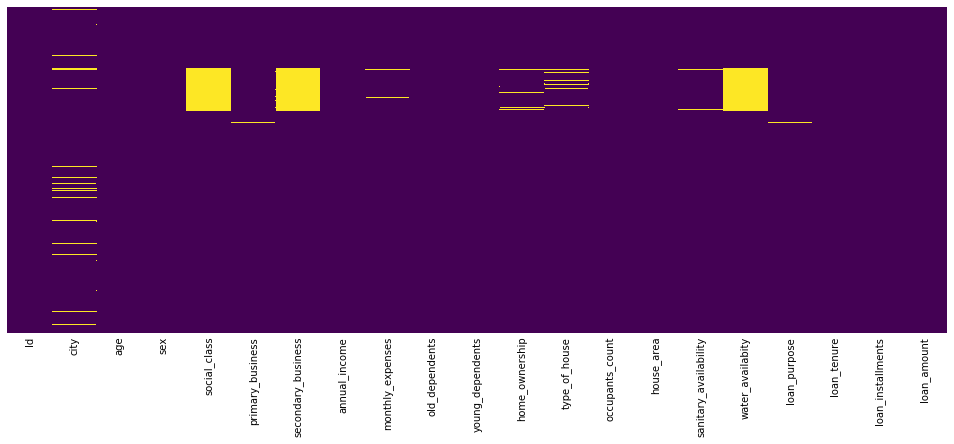

In [13]:
pylab.rcParams['figure.figsize'] = (15.0, 6.0)
sns.heatmap(data.isnull(),yticklabels = False, cbar= False,cmap='viridis')

####  if 'all' values are missing in a row, then drop that row (none are dropped in this case)

In [14]:
data.dropna(how='all').shape
# Not a single row which has all null values

(40000, 21)

In [15]:
# if 'any' values are missing in a row, check how many rows are there
x = data.dropna(how='any').shape
x

(33063, 21)

In [16]:
# explicitly include missing values
data['city'].value_counts(dropna=False).head()

pusad         4944
bahoriband    1979
NaN           1866
shantipur     1727
imphal        1702
Name: city, dtype: int64

### Imputation of missing values in categorical variables

#### Replacing with Unknown category

In [17]:
data['city'].fillna("Unknown", inplace = True)
data['social_class'].fillna("Unknown", inplace = True)
data['primary_business'].fillna("Unknown", inplace = True)
data['secondary_business'].fillna("Unknown", inplace = True)
data['loan_purpose'].fillna("Unknown", inplace = True)

#### Forward fill

In [18]:
data["home_ownership"].fillna( method ='ffill', inplace = True) 
data["sanitary_availability"].fillna( method ='ffill', inplace = True) 
data["water_availabity"].fillna( method ='ffill', inplace = True) 
data["type_of_house"].fillna( method ='ffill', inplace = True) 
data.isnull().sum()

Id                         0
city                       0
age                        0
sex                        0
social_class               0
primary_business           0
secondary_business         0
annual_income              0
monthly_expenses         120
old_dependents             0
young_dependents           0
home_ownership             0
type_of_house              0
occupants_count            0
house_area                 0
sanitary_availability      0
water_availabity           0
loan_purpose               0
loan_tenure                0
loan_installments          0
loan_amount                0
dtype: int64

### Imputation of missing values in numerical variables

#### Monthly Expense Distribution - First treating the outlier before treating the missing values

In [19]:
data["monthly_expenses"].describe().apply(lambda x: format(round(x,1), 'f'))

count     39880.000000
mean       3810.900000
std        4593.000000
min           2.000000
25%        2500.000000
50%        3500.000000
75%        4000.000000
max      240000.000000
Name: monthly_expenses, dtype: object

Text(0.5, 1.0, 'Monthly Expenses Distribution')

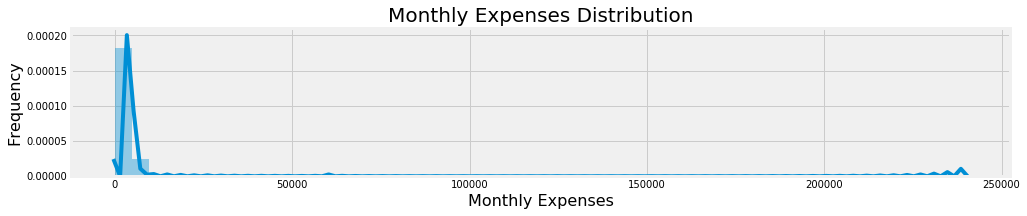

In [20]:
plt.subplot(211)
g = sns.distplot(data["monthly_expenses"].dropna())
g.set_xlabel("Monthly Expenses", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Monthly Expenses Distribution", fontsize=20)

There is an individual whose monthly expense is 62 (max value of monthly expense 240000) times higher than overall average, which indicates outlier presence in the data, also the distribution of monthly expense is right skewed as shown above

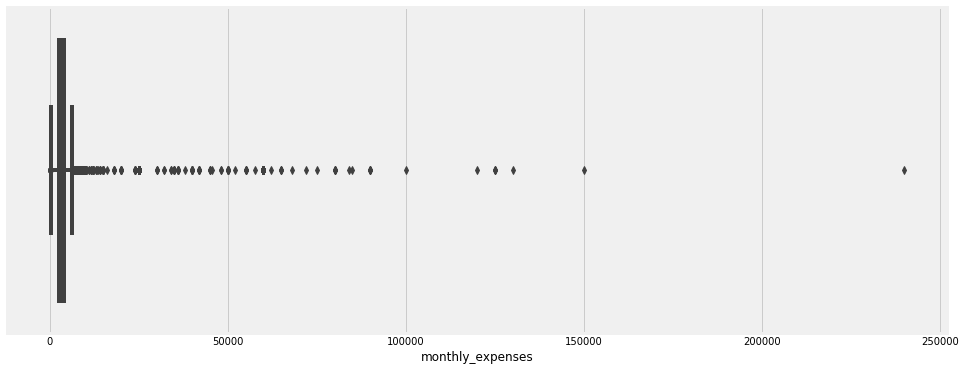

In [35]:
sns.boxplot(x=data['monthly_expenses'].dropna())

In [36]:
## Replacing with .999 quantiles
q_upper = data["monthly_expenses"].quantile(.999)
q_upper

60000.0

In [37]:
data['monthly_expenses'] = np.where(data['monthly_expenses'] >= q_upper,q_upper,data['monthly_expenses'])
data['monthly_expenses'].describe()

count    39880.000000
mean      3787.404990
std       4086.203429
min          2.000000
25%       2500.000000
50%       3500.000000
75%       4000.000000
max      60000.000000
Name: monthly_expenses, dtype: float64

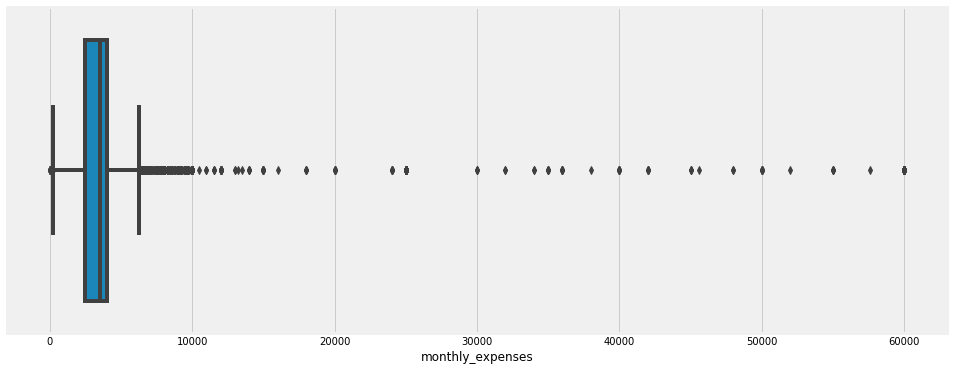

In [38]:
sns.boxplot(x=data['monthly_expenses'].dropna())

#### Replace NA values with Median of monthly expense

In [21]:
median_expense = data["monthly_expenses"].median()
median_expense

3500.0

In [22]:
data['monthly_expenses'].fillna(median_expense, inplace = True)

## Annual Expense and Expense to Income Ratio variables to be created

In [23]:
data['annual_Expense']= data['monthly_expenses']*12
data.head()

Id      city  age sex social_class primary_business secondary_business  \
0   1   dhanbad   22   f        mochi        tailoring             others   
1   2  manjapra   21   f          obc        tailoring               none   
2   3   dhanbad   24   m          nai     beauty salon             others   
3   4   Unknown   26   f          obc        tailoring               none   
4   5   nuapada   23   f          obc    general store        agriculture   

   annual_income  monthly_expenses  old_dependents       ...        \
0        36000.0            5000.0               0       ...         
1        94000.0            3600.0               1       ...         
2        48000.0            4000.0               0       ...         
3         7000.0            5000.0               0       ...         
4        36000.0            3500.0               0       ...         

   type_of_house  occupants_count house_area  sanitary_availability  \
0              r                4       70.0                    1.0   
1             t1                4       80.0                    1.0   
2             t1                4       50.0                    1.0   
3             t1                5       50.0                    1.0   
4             t1                1      112.0                    1.0   

   water_availabity  loan_purpose  loan_tenure loan_installments  loan_amount  \
0               0.5      apparels           12                12       5000.0   
1               0.5      apparels           12                50       7500.0   
2               0.5  beauty salon           12                12       5000.0   
3               0.5      apparels           12                50       7500.0   
4               0.5  retail store           12                12       5000.0   

   annual_Expense  
0         60000.0  
1         43200.0  
2         48000.0  
3         60000.0  
4         42000.0  

[5 rows x 22 columns]

In [24]:
data['expense_income_ratio']= data['annual_Expense']/data['annual_income']
data.head()

Id      city  age sex social_class primary_business secondary_business  \
0   1   dhanbad   22   f        mochi        tailoring             others   
1   2  manjapra   21   f          obc        tailoring               none   
2   3   dhanbad   24   m          nai     beauty salon             others   
3   4   Unknown   26   f          obc        tailoring               none   
4   5   nuapada   23   f          obc    general store        agriculture   

   annual_income  monthly_expenses  old_dependents          ...           \
0        36000.0            5000.0               0          ...            
1        94000.0            3600.0               1          ...            
2        48000.0            4000.0               0          ...            
3         7000.0            5000.0               0          ...            
4        36000.0            3500.0               0          ...            

   occupants_count  house_area sanitary_availability  water_availabity  \
0                4        70.0                   1.0               0.5   
1                4        80.0                   1.0               0.5   
2                4        50.0                   1.0               0.5   
3                5        50.0                   1.0               0.5   
4                1       112.0                   1.0               0.5   

   loan_purpose  loan_tenure  loan_installments loan_amount  annual_Expense  \
0      apparels           12                 12      5000.0         60000.0   
1      apparels           12                 50      7500.0         43200.0   
2  beauty salon           12                 12      5000.0         48000.0   
3      apparels           12                 50      7500.0         60000.0   
4  retail store           12                 12      5000.0         42000.0   

   expense_income_ratio  
0              1.666667  
1              0.459574  
2              1.000000  
3              8.571429  
4              1.166667  

[5 rows x 23 columns]

#### Annual Income Distribution

In [294]:
data["annual_income"].describe().apply(lambda x: format(round(x,1), 'f'))

count      40000.000000
mean       37640.200000
std        28739.100000
min            0.000000
25%        14400.000000
50%        36000.000000
75%        56000.000000
max      1200000.000000
Name: annual_income, dtype: object

Text(0.5, 1.0, 'Annual Income Distribution')

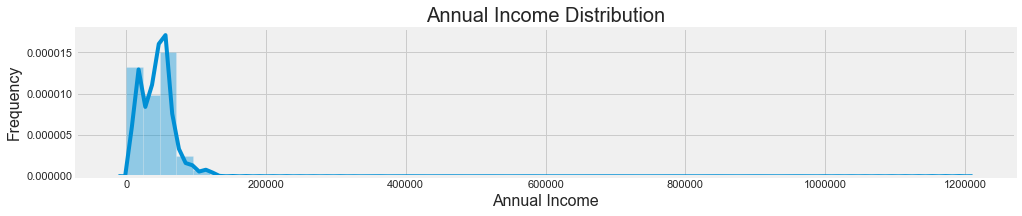

In [295]:
plt.subplot(211)
g = sns.distplot(data["annual_income"])
g.set_xlabel("Annual Income", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Annual Income Distribution", fontsize=20)

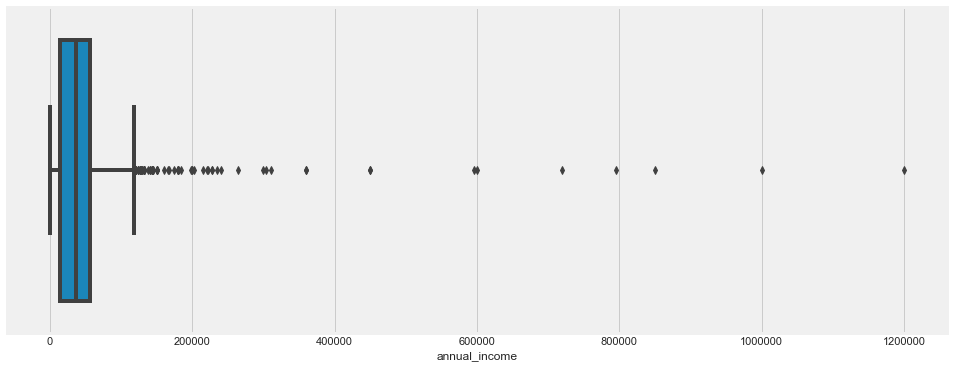

In [296]:
sns.boxplot(x=data['annual_income'])

Annual income distribution is right skewed, A couple of outliers present in the income variable, Max income value 31 times higher than average income

#### Manually replacing/capping outlier values to max values

In [297]:
## Replacing with .999 quantiles
q_upper = data["annual_income"].quantile(.999)
q_upper

150000.0

In [298]:
data['annual_income'] = np.where(data['annual_income'] >= q_upper,q_upper,data['annual_income'])
data['annual_income'].describe()

count     40000.000000
mean      37456.931075
std       26228.901998
min           0.000000
25%       14400.000000
50%       36000.000000
75%       56000.000000
max      150000.000000
Name: annual_income, dtype: float64

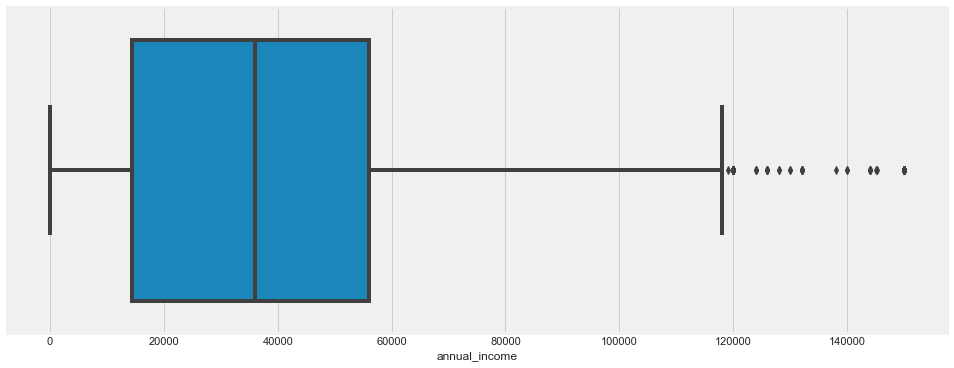

In [299]:
sns.boxplot(x=data['annual_income'])

Box plot of annual income post removal of 99.9% percentile values

# Exploratory Data Analysis - II

### City - Univariate Analysis

In [341]:
data.city.unique()

In [156]:
type_of_business = data[['Id','city']].groupby('city').agg({'Id':'count'}).sort_values('Id',ascending = False)
type_of_business['Percentage'] = 100 * type_of_business['Id']  / type_of_business['Id'].sum()
type_of_business.head(10)

Id  Percentage
city                          
pusad         4944     12.3600
bahoriband    1979      4.9475
Unknown       1866      4.6650
shantipur     1727      4.3175
imphal        1702      4.2550
gwalior       1587      3.9675
mathurapur    1361      3.4025
sandeshkhali  1183      2.9575
joynagar       993      2.4825
pune           978      2.4450

Pusad has highest number of people applying for loan followed by Bahoriband

### Bi-Variate Analysis

#### Average Loan Amount applied by City

In [187]:
city_loan = data[['loan_amount','Id','city']].groupby('city').agg({'loan_amount':'mean','Id':'count'}).sort_values('loan_amount',ascending = False)
city_loan['Percentage'] = 100 * city_loan['loan_amount']  / city_loan['loan_amount'].sum()
city_loan.head(10)

loan_amount  Id  Percentage
city                                       
bhimanakone  1000000.000000   1   11.840290
shimoga       625000.000000   4    7.400181
jalgaon       292400.000000   1    3.462101
ranjani       135000.000000   2    1.598439
bahadarpur    112500.000000   6    1.332033
anupshahr     103000.000000   1    1.219550
mangoan       100000.000000   1    1.184029
varanasi       94458.333333  12    1.118414
hubli          84833.333333  12    1.004451
thakurpukur    77357.142857  14    0.915931

Top 10 cities with higher average loan amounts but very few loan applications are coming from each of top loan amount seeking citites

Text(0.5, 1.0, 'Average Loan Amount by City')

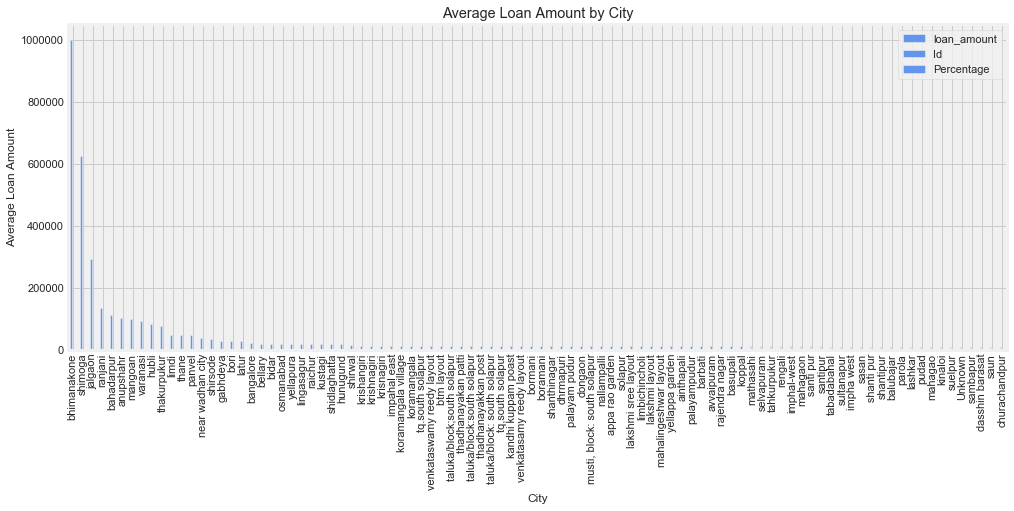

In [198]:
mask = city_loan['loan_amount'] > 10000
city_loan_high = city_loan[mask]
pylab.rcParams['figure.figsize'] = (15.0, 6.0)
city_loan_high.plot.bar(color='cornflowerblue')
plt.xlabel('City')
plt.ylabel('Average Loan Amount')
plt.title("Average Loan Amount by City")

Less than 100 cities have applied for a loan > 10000, many individuals have applied small loans

### Annual Income and Expenses by City

In [344]:
city_income = data[['annual_income','loan_amount','Id','city']].groupby('city').agg({'annual_income':'mean','loan_amount':'mean','Id':'count'}).sort_values('annual_income',ascending = False)
city_income['Percentage'] = 100 * city_income['annual_income']  / city_income['annual_income'].sum()
city_income.tail(20)

annual_income  loan_amount  Id  Percentage
city                                                       
parbatipur                 0.0       5000.0   2         0.0
gandhi ashram              0.0       5000.0   5         0.0
gandinagar                 0.0       7500.0   8         0.0
ganesh ward                0.0       5000.0   5         0.0
pattanaiksahi              0.0       5000.0   1         0.0
pattanaikia                0.0       5000.0   2         0.0
parvati nagar              0.0       5000.0  21         0.0
parsaguda                  0.0       3000.0   4         0.0
ganganarayanpur            0.0       5000.0   1         0.0
parasagada                 0.0       3000.0   1         0.0
gualigorada                0.0       5000.0   5         0.0
godfula                    0.0       3000.0  67         0.0
godphula                   0.0       3000.0  58         0.0
goldphula                  0.0       3000.0   3         0.0
panjampur                  0.0       3000.0   1         0.0
panchampur                 0.0       3000.0   9         0.0
palodi                     0.0       5000.0  19         0.0
palayampudur               0.0      15000.0   2         0.0
palayam pudur              0.0      15000.0   1         0.0
yemmiganur                 0.0       5000.0  67         0.0

Cities with lowest average annual income with loan amount

In [345]:
city_income.head(10)

annual_income  loan_amount  Id  Percentage
city                                                        
mangoan           450000.000000     100000.0   1    2.333160
shirwal           340000.000000      16700.0   3    1.762832
near wadhan city  215000.000000      40000.0   1    1.114732
limdi             202500.000000      50000.0   4    1.049922
bidar             200000.000000      20000.0   1    1.036960
shidlaghatta      150000.000000      20000.0   1    0.777720
ranjani           150000.000000     135000.0   2    0.777720
thane             125000.000000      50000.0   2    0.648100
raichur           120000.000000      20000.0   1    0.622176
vijayraghavgarh   119714.285714      10000.0   7    0.620695

### Top 10 cities with highest average annual income with loan amount
Average loan amount siginificantly differs amongst cites above indicating an important factor in sizing the loan amount 

### Combining the levels of cities by looking at average loan amount per city and combining cities which are close 

In [311]:
top_10 = [x for x in data.city.value_counts().sort_values(ascending=False).head(10).index]
top_10

['pusad',
 'bahoriband',
 'Unknown',
 'shantipur',
 'imphal',
 'gwalior',
 'mathurapur',
 'sandeshkhali',
 'joynagar',
 'pune']

In [75]:
# def city_loan(loans,city):
#     if (loans >= 50000):
#         return 'High_loan_amt_app_cities'
#     elif (loans >= 20000 and loans < 50000):
#         return 'Mid_Loan_amt_app_cities'
#     elif (loans >= 10000 and loans < 20000):
#         return 'low_Loan_amt_app_cities'
#     elif (loans >= 5000 and loans < 10000):
#         return 'very_low_Loan_amt_app_cities'
#     else:
#         return 'Day_2_Day_loans'

In [76]:
# data['new_city'] = data[['loan_amount','city']].apply(lambda x: city_loan(x['loan_amount'],x['city']), axis=1)
# data.head()

Id      city  age sex social_class primary_business secondary_business  \
0   1   dhanbad   22   f        mochi        tailoring             others   
1   2  manjapra   21   f          obc        tailoring               none   
2   3   dhanbad   24   m          nai     beauty salon             others   
3   4   Unknown   26   f          obc        tailoring               none   
4   5   nuapada   23   f          obc    general store        agriculture   

   annual_income  monthly_expenses  old_dependents  \
0        36000.0            5000.0               0   
1        94000.0            3600.0               1   
2        48000.0            4000.0               0   
3         7000.0            5000.0               0   
4        36000.0            3500.0               0   

               ...               loan_purpose  loan_tenure loan_installments  \
0              ...                   apparels           12                12   
1              ...                   apparels           12                50   
2              ...               beauty salon           12                12   
3              ...                   apparels           12                50   
4              ...               retail store           12                12   

   loan_amount  annual_Expense  expense_income_ratio         new_social_class  \
0       5000.0         60000.0              1.666667  very_low_Loan_amt_class   
1       7500.0         43200.0              0.459574  very_low_Loan_amt_class   
2       5000.0         48000.0              1.000000  very_low_Loan_amt_class   
3       7500.0         60000.0              8.571429  very_low_Loan_amt_class   
4       5000.0         42000.0              1.166667  very_low_Loan_amt_class   

      income_group  expense_group                      new_city  
0       Mid_Income   High_Expense  very_low_Loan_amt_app_cities  
1      High_Income    Mid_Expense  very_low_Loan_amt_app_cities  
2       Mid_Income    Mid_Expense  very_low_Loan_amt_app_cities  
3  Very_Low_Income   High_Expense  very_low_Loan_amt_app_cities  
4       Mid_Income    Mid_Expense  very_low_Loan_amt_app_cities  

[5 rows x 27 columns]

In [77]:
# city_income = data[['annual_income','loan_amount','Id','new_city']].groupby('new_city').agg({'annual_income':'mean','loan_amount':'mean','Id':'count'}).sort_values('annual_income',ascending = False)
# city_income['Percentage'] = 100 * city_income['annual_income']  / city_income['annual_income'].sum()
# city_income.tail(20)

annual_income    loan_amount     Id  Percentage
new_city                                                                     
Mid_Loan_amt_app_cities        92387.596899   23497.674419    129   35.601244
High_loan_amt_app_cities       80663.829787  262782.978723     47   31.083530
low_Loan_amt_app_cities        45509.148570   11551.909540  13354   17.536794
very_low_Loan_amt_app_cities   34389.147958    6432.796544  25460   13.251740
Day_2_Day_loans                 6556.930693    3048.019802   1010    2.526691

### Combining levels of city to reduce the categories

In [134]:
city_list = ['anupshahr','bahadarpur','bhimanakone','hubli','jalgaon','limdi','mangoan','near wadhan city',
'panvel','ranjani','shimoga','shirsode','thakurpukur','thane','varanasi']

In [146]:
def cityval(city):
    if city == 'anupshahr':
        return 'anupshahr'
    elif city == 'bahadarpur':
        return 'bahadarpur'
    elif city == 'bhimanakone':
        return 'bhimanakone'
    elif city == 'hubli':
        return 'hubli'
    elif city == 'jalgaon':
        return 'jalgaon'
    elif city == 'limdi':
        return 'limdi'
    elif city == 'mangoan':
        return 'mangoan'
    elif city == 'near wadhan city':
        return 'near wadhan city'
    elif city == 'panvel':
        return 'panvel'
    elif city == 'ranjani':
        return 'ranjani'
    elif city == 'shimoga':
        return 'shimoga'
    elif city == 'shirsode':
        return 'shirsode'
    elif city == 'thakurpukur':
        return 'thakurpukur'
    elif city == 'thane':
        return 'thane'
    elif city == 'varanasi':
        return 'varanasi'
    else:
        return 'others'

In [1]:
data['new_city'] = data[['city']].apply(lambda x: cityval(x['city']), axis=1)
data.new_city.unique()

NameError: name 'data' is not defined

## Annual Income Group

In [70]:
def Income(income):
    if (income >= 50000):
        return 'High_Income'
    elif (income >= 20000 and income < 50000):
        return 'Mid_Income'
    elif (income >= 10000 and income < 20000):
        return 'Low_Income'
    elif (income >= 5000 and income < 10000):
        return 'Very_Low_Income'
    elif (income == 0):
        return 'No_Income'
    else:
        return '<5K_Annual_Income'

In [71]:
data['income_group'] = data[['annual_income']].apply(lambda x: Income(x['annual_income']), axis=1)
data.head()

Id      city  age sex social_class primary_business secondary_business  \
0   1   dhanbad   22   f        mochi        tailoring             others   
1   2  manjapra   21   f          obc        tailoring               none   
2   3   dhanbad   24   m          nai     beauty salon             others   
3   4   Unknown   26   f          obc        tailoring               none   
4   5   nuapada   23   f          obc    general store        agriculture   

   annual_income  monthly_expenses  old_dependents       ...         \
0        36000.0            5000.0               0       ...          
1        94000.0            3600.0               1       ...          
2        48000.0            4000.0               0       ...          
3         7000.0            5000.0               0       ...          
4        36000.0            3500.0               0       ...          

   sanitary_availability  water_availabity  loan_purpose  loan_tenure  \
0                    1.0               0.5      apparels           12   
1                    1.0               0.5      apparels           12   
2                    1.0               0.5  beauty salon           12   
3                    1.0               0.5      apparels           12   
4                    1.0               0.5  retail store           12   

   loan_installments  loan_amount  annual_Expense expense_income_ratio  \
0                 12       5000.0         60000.0             1.666667   
1                 50       7500.0         43200.0             0.459574   
2                 12       5000.0         48000.0             1.000000   
3                 50       7500.0         60000.0             8.571429   
4                 12       5000.0         42000.0             1.166667   

          new_social_class     income_group  
0  very_low_Loan_amt_class       Mid_Income  
1  very_low_Loan_amt_class      High_Income  
2  very_low_Loan_amt_class       Mid_Income  
3  very_low_Loan_amt_class  Very_Low_Income  
4  very_low_Loan_amt_class       Mid_Income  

[5 rows x 25 columns]

## Annual Expense

In [72]:
def Expense(expense):
    if (expense >= 50000):
        return 'High_Expense'
    elif (expense >= 20000 and expense < 50000):
        return 'Mid_Expense'
    elif (expense >= 10000 and expense < 20000):
        return 'Low_Expense'
    elif (expense >= 5000 and expense < 10000):
        return 'Very_Low_Expense'
    elif (expense == 0):
        return 'No_Expense'
    else:
        return '<5K_Expenses'

In [78]:
data['expense_group'] = data[['annual_Expense']].apply(lambda x: Expense(x['annual_Expense']), axis=1)
data.head()

Id      city  age sex social_class primary_business secondary_business  \
0   1   dhanbad   22   f        mochi        tailoring             others   
1   2  manjapra   21   f          obc        tailoring               none   
2   3   dhanbad   24   m          nai     beauty salon             others   
3   4   Unknown   26   f          obc        tailoring               none   
4   5   nuapada   23   f          obc    general store        agriculture   

   annual_income  monthly_expenses  old_dependents  \
0        36000.0            5000.0               0   
1        94000.0            3600.0               1   
2        48000.0            4000.0               0   
3         7000.0            5000.0               0   
4        36000.0            3500.0               0   

               ...               loan_purpose  loan_tenure loan_installments  \
0              ...                   apparels           12                12   
1              ...                   apparels           12                50   
2              ...               beauty salon           12                12   
3              ...                   apparels           12                50   
4              ...               retail store           12                12   

   loan_amount  annual_Expense  expense_income_ratio         new_social_class  \
0       5000.0         60000.0              1.666667  very_low_Loan_amt_class   
1       7500.0         43200.0              0.459574  very_low_Loan_amt_class   
2       5000.0         48000.0              1.000000  very_low_Loan_amt_class   
3       7500.0         60000.0              8.571429  very_low_Loan_amt_class   
4       5000.0         42000.0              1.166667  very_low_Loan_amt_class   

      income_group  expense_group                      new_city  
0       Mid_Income   High_Expense  very_low_Loan_amt_app_cities  
1      High_Income    Mid_Expense  very_low_Loan_amt_app_cities  
2       Mid_Income    Mid_Expense  very_low_Loan_amt_app_cities  
3  Very_Low_Income   High_Expense  very_low_Loan_amt_app_cities  
4       Mid_Income    Mid_Expense  very_low_Loan_amt_app_cities  

[5 rows x 27 columns]

#### Crosstab view of Income and Expense with Loan Amount

In [87]:
income_expense = data.groupby(['income_group','expense_group'])['loan_amount'].aggregate('mean')
income_expense.unstack('income_group') # to create a pivot view like dataset

income_group      <5K_Annual_Income   High_Income   Low_Income    Mid_Income  \
expense_group                                                                  
<5K_Expenses            2000.000000  10357.142857  7333.333333  10555.555556   
High_Expense            5454.545455   9589.861370  8876.235294   8001.474654   
Low_Expense             4900.000000   9114.645858  6631.481481   8653.900156   
Mid_Expense             5382.266010   9566.821982  8260.909343   8937.261404   
Very_Low_Expense        5000.000000   9340.909091  6000.000000   9611.111111   

income_group        No_Income  Very_Low_Income  
expense_group                                   
<5K_Expenses      5500.000000      3833.333333  
High_Expense      5801.451751      6118.518519  
Low_Expense       6363.281250      5125.000000  
Mid_Expense       5277.396617      5824.058770  
Very_Low_Expense  6785.714286      5633.333333

# social_class
## Univariate Analysis

In [43]:
data.social_class.unique()

array(['mochi', 'obc', 'nai', 'muchi', 'kusbaha', 'rajput', 'gorai',
       'bouri', 'nil', 'sc', 'mouchi', 'teli', 'broman', 'tali', 'muslim',
       'ezhava', 'st', 'christian', 'baniya', 'modi', 'toli', 'kewat',
       'noli', 'general', 'shiv nagar goli', 'janral', 'hindu', 's.c',
       'minority', 'gen', 'bc', 'other', 'su', 'mm', 'musilim', 'chetty',
       'yadav', 'bodhi', 'punjabi', 'pandit', 'bhuiya', 'mushar',
       'gen- bpl', 'gten', 'kuravu', 'kumhar', 'lohar', 'chamar',
       'gowala', 'chetti', 'christians', 'naikan', 'vjnt', 'st gond',
       'mc', 's.c.', 'gn', 'mushlim', 'panjabi', 'open', 'gc', 'nt',
       's.t.', 'mannan', 'shiv', 'nair', 'pilla', 'genl', 'ac', 'hindhu',
       'nayakkan', 'visawakarma', 'viswakarma', 'thandan', 'sekh',
       'minority comunity', 'maniroty comunity', 's.e.b.c', 'ujnt',
       'oraon', 'mbc', 'married', 'genral', 'cheruman', 'cristan',
       'muslin', 'kavara', 'islam', 'kanakkan', 'ezhuva', 'generalh',
       's c', 'gayatri'

In [215]:
social_class_Id = data[['Id','social_class']].groupby('social_class').agg({'Id':'count'}).sort_values('Id',ascending = False)
social_class_Id['Percentage'] = 100 * social_class_Id['Id']  / social_class_Id['Id'].sum()
social_class_Id.head(10)

Id  Percentage
social_class                   
obc           11169     27.9225
Unknown        5255     13.1375
sc             3722      9.3050
st             2696      6.7400
general        2526      6.3150
muslim         2131      5.3275
s.c            1239      3.0975
minority        965      2.4125
hindu           902      2.2550
gc              807      2.0175

### Average amount of loan by social class

In [229]:
social_class_loan = data[['loan_amount','Id','social_class']].groupby('social_class').agg({'loan_amount':'mean','Id':'count'}).sort_values('loan_amount',ascending = False)
social_class_loan['Percentage'] = 100 * social_class_loan['loan_amount']  / social_class_loan['loan_amount'].sum()
social_class_loan.head(10)

loan_amount  Id  Percentage
social_class                                    
annn                   1343000.0   1   17.352270
traditional weaving     594300.0  10    7.678670
abc                     500000.0   1    6.460264
tribal artisans         500000.0   1    6.460264
sdf                     360000.0   2    4.651390
papad making            225000.0   2    2.907119
ew                      157000.0   1    2.028523
bramin                   40000.0   3    0.516821
not available            35000.0   2    0.452219
kasar- obc               30000.0   1    0.387616

Text(0.5, 1.0, 'Average Loan Amount by social_class')

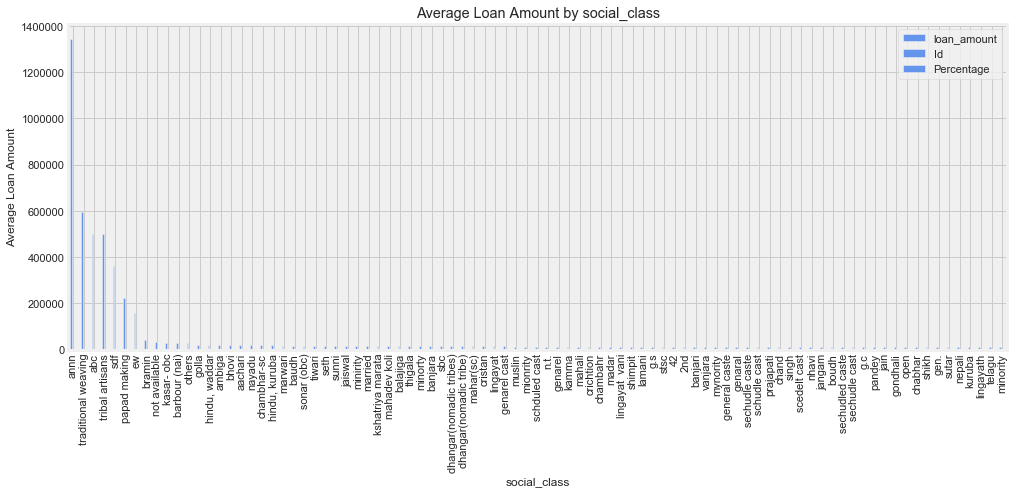

In [248]:
mask = social_class_loan['loan_amount'] > 10000
social_class_loan_high = social_class_loan[mask]
pylab.rcParams['figure.figsize'] = (15.0, 6.0)
social_class_loan_high.plot.bar(color='cornflowerblue')
plt.xlabel('social_class')
plt.ylabel('Average Loan Amount')
plt.title("Average Loan Amount by social_class")

In [57]:
social_class_loan_income = data[['loan_amount','annual_income','Id','social_class']].groupby('social_class').agg({'loan_amount':'mean','annual_income':'mean','Id':'count'}).sort_values('loan_amount',ascending = False)
social_class_loan_income['Percentage'] = 100 * social_class_loan_income['loan_amount']  / social_class_loan_income['loan_amount'].sum()
social_class_loan_income.head(10)

loan_amount  annual_income  Id  Percentage
social_class                                                   
annn                   1343000.0        50000.0   1   17.352270
traditional weaving     594300.0        45800.0  10    7.678670
abc                     500000.0        60000.0   1    6.460264
tribal artisans         500000.0        40000.0   1    6.460264
sdf                     360000.0        30000.0   2    4.651390
papad making            225000.0        50000.0   2    2.907119
ew                      157000.0        36000.0   1    2.028523
bramin                   40000.0        48000.0   3    0.516821
not available            35000.0        82500.0   2    0.452219
kasar- obc               30000.0        18000.0   1    0.387616

### Average Loan amount with income and expenses by social class

In [60]:
social_class_loan_income = data[['loan_amount','annual_income','annual_Expense','Id','social_class']].groupby('social_class').agg({'loan_amount':'mean','annual_income':'mean','annual_Expense':'mean','Id':'count'}).sort_values('loan_amount',ascending = False)
social_class_loan_income['Percentage'] = 100 * social_class_loan_income['loan_amount']  / social_class_loan_income['loan_amount'].sum()
social_class_loan_income.head(10)

loan_amount  annual_income  annual_Expense  Id  \
social_class                                                          
annn                   1343000.0        50000.0         36000.0   1   
traditional weaving     594300.0        45800.0         93000.0  10   
abc                     500000.0        60000.0         60000.0   1   
tribal artisans         500000.0        40000.0         36000.0   1   
sdf                     360000.0        30000.0         42000.0   2   
papad making            225000.0        50000.0         45000.0   2   
ew                      157000.0        36000.0         30000.0   1   
bramin                   40000.0        48000.0        224000.0   3   
not available            35000.0        82500.0         30000.0   2   
kasar- obc               30000.0        18000.0         42000.0   1   

                     Percentage  
social_class                     
annn                  17.352270  
traditional weaving    7.678670  
abc                    6.460264  
tribal artisans        6.460264  
sdf                    4.651390  
papad making           2.907119  
ew                     2.028523  
bramin                 0.516821  
not available          0.452219  
kasar- obc             0.387616

### Top social classes by average loan amount with average income and expense
Average loan amount siginificantly differs amongst social class above indicating an important factor in sizing the loan amount 
Though Income and Expense does not vary a lot amongst above groups 

In [63]:
social_class_loan_income.tail(10)

loan_amount  annual_income  annual_Expense  Id  \
social_class                                                           
pashi                 5000.000000   96000.000000    72000.000000   1   
generalh              5000.000000   66000.000000    90000.000000   2   
pandit                5000.000000   48000.000000    45000.000000   2   
gn                    5000.000000   24000.000000    36000.000000   1   
other backward caste  5000.000000   36960.000000    31680.000000   5   
beda                  3181.818182    5113.636364    45818.181818  22   
jenu kuruba           3000.000000    7000.000000    60000.000000   1   
jain kuruba           3000.000000    5500.000000    36000.000000   2   
yarava                3000.000000    7500.000000    46800.000000   4   
yaruvas               3000.000000    5000.000000    12000.000000   1   

                      Percentage  
social_class                      
pashi                   0.064603  
generalh                0.064603  
pandit                  0.064603  
gn                      0.064603  
other backward caste    0.064603  
beda                    0.041111  
jenu kuruba             0.038762  
jain kuruba             0.038762  
yarava                  0.038762  
yaruvas                 0.038762

Text(0.5, 1.0, 'Average Loan Amount by social_class')

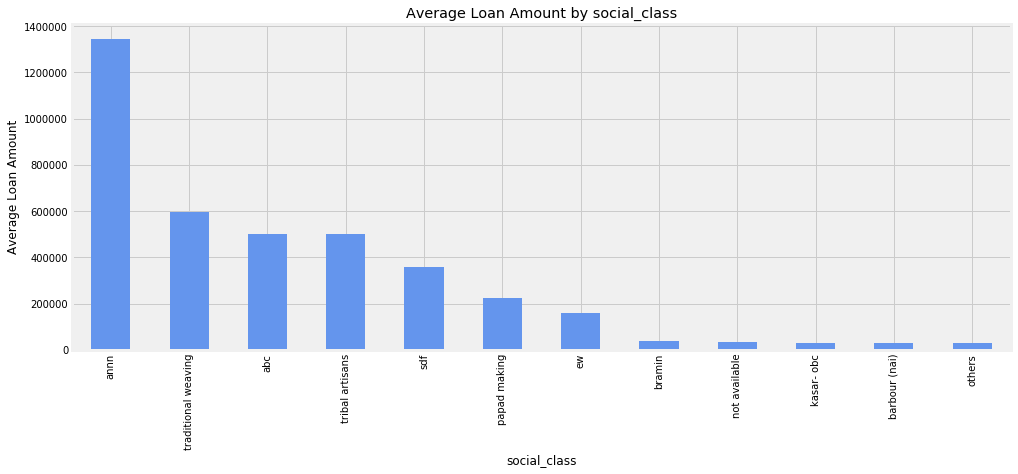

In [97]:
mask = social_class_loan_income['loan_amount'] > 20000
social_class_loan_income_high = social_class_loan_income[mask]
pylab.rcParams['figure.figsize'] = (15.0, 6.0)
social_class_loan_income_high['loan_amount'].plot.bar(color='cornflowerblue')
plt.xlabel('social_class')
plt.ylabel('Average Loan Amount')
plt.title("Average Loan Amount by social_class")

###  Loan amt applied by combined Social Class

In [46]:
# def new_social_class(loans,social_class):
#     if (loans >= 50000):
#         return 'High_loan_amt_app_class'
#     elif (loans >= 20000 and loans < 50000):
#         return 'Mid_Loan_amt_app_class'
#     elif (loans >= 10000 and loans < 20000):
#         return 'low_Loan_amt_app_class'
#     elif (loans >= 5000 and loans < 10000):
#         return 'very_low_Loan_amt_class'
#     else:
#         return 'Day_2_Day_loans'
# data['new_social_class'] = data[['loan_amount','social_class']].apply(lambda x: new_social_class(x['loan_amount'],x['social_class']),axis = 1)
# data.head()

In [52]:
class_loans = data[['annual_income','annual_Expense','loan_amount','Id','new_social_class']].groupby('new_social_class').agg({'annual_income':'mean','annual_Expense':'mean','loan_amount':'mean','Id':'count'}).sort_values('annual_income',ascending = False)
class_loans['Percentage'] = 100 * class_loans['annual_income']  / class_loans['annual_income'].sum()
class_loans.tail(20)

annual_income  annual_Expense    loan_amount     Id  \
new_social_class                                                               
Mid_Loan_amt_app_class    92387.596899    70372.093023   23497.674419    129   
High_loan_amt_app_class   80663.829787   114178.723404  262782.978723     47   
low_Loan_amt_app_class    45509.148570    42506.484649   11551.909540  13354   
very_low_Loan_amt_class   34389.147958    46424.650275    6432.796544  25460   
Day_2_Day_loans            6556.930693    52963.306931    3048.019802   1010   

                         Percentage  
new_social_class                     
Mid_Loan_amt_app_class    35.601244  
High_loan_amt_app_class   31.083530  
low_Loan_amt_app_class    17.536794  
very_low_Loan_amt_class   13.251740  
Day_2_Day_loans            2.526691

### Combining levels of social_class to reduce the categories

In [152]:
soc_class = ['marwari','lingayath','golla','ambiga','hindu, kuruba','bhovi','hindu, waddar',
             'baudh','bramin','dhangar(nomadic tribes)','kasar- obc','barbour (nai)','chambhar-sc',
             'traditional weaving','papad making','not available','minorty','tribal artisans',
             'nayadu','aachari','annn','sdf','ew','abc']

In [161]:
def class_1val(class_1):
    if class_1  ==  'marwari':
        return  'marwari'
    elif class_1  ==  'lingayath':
        return  'lingayath'
    elif class_1  ==  'golla':
        return  'golla'
    elif class_1  ==  'ambiga':
        return  'ambiga'
    elif class_1  ==  'bhovi':
        return  'bhovi'
    elif class_1  ==  'baudh':
        return  'baudh'
    elif class_1  ==  'bramin':
        return  'bramin'
    elif class_1  ==  'dhangar(nomadic tribes)':
        return  'dhangar(nomadic tribes)'
    elif class_1  ==  'kasar- obc':
        return  'kasar- obc'
    elif class_1  ==  'barbour (nai)':
        return  'barbour (nai)'
    elif class_1  ==  'chambhar-sc':
        return  'chambhar-sc'
    elif class_1  ==  'traditional weaving':
        return  'traditional weaving'
    elif class_1  ==  'papad making':
        return  'papad making'
    elif class_1  ==  'not available':
        return  'not available'
    elif class_1  ==  'minorty':
        return  'minorty'
    elif class_1  ==  'tribal artisans':
        return  'tribal artisans'
    elif class_1  ==  'nayadu':
        return  'nayadu'
    elif class_1  ==  'aachari':
        return  'aachari'
    elif class_1  ==  'annn':
        return  'annn'
    elif class_1  ==  'sdf':
        return  'sdf'
    elif class_1  ==  'ew':
        return  'ew'
    elif class_1  ==  'abc':
        return  'abc'
    elif class_1  ==  'hindu, kuruba':
        return  'hindu, kuruba'
    elif class_1  ==  'hindu, waddar':
        return  'hindu, waddar'
    else:
        return 'others'

In [163]:
data['new_social_class'] = data[['social_class']].apply(lambda x: class_1val(x['social_class']), axis=1)
data.new_social_class.unique()

array(['others', 'marwari', 'lingayath', 'golla', 'ambiga',
       'hindu, kuruba', 'bhovi', 'hindu, waddar', 'baudh', 'bramin',
       'dhangar(nomadic tribes)', 'kasar- obc', 'barbour (nai)',
       'chambhar-sc', 'traditional weaving', 'papad making',
       'not available', 'minorty', 'tribal artisans', 'nayadu', 'aachari',
       'annn', 'sdf', 'ew', 'abc'], dtype=object)

# Primary Business Type
## Univariate Analysis

### Number of Individuals by Primary Business Type

In [107]:
type_of_business = data[['Id','primary_business']].groupby('primary_business').agg({'Id':'count'}).sort_values('Id',ascending = False)
type_of_business['Percentage'] = 100 * type_of_business['Id']  / type_of_business['Id'].sum()
type_of_business.head(20)

Id  Percentage
primary_business                       
tailoring              3971      9.9275
goat rearing           2268      5.6700
cow rearing            2080      5.2000
handloom work          2068      5.1700
vegetable cultivation  1704      4.2600
grocery store          1369      3.4225
school                 1332      3.3300
milk business          1317      3.2925
vegetable vendor       1174      2.9350
weaver                 1157      2.8925
saree business         1000      2.5000
embroidery work         942      2.3550
fish rearing            735      1.8375
poultry farm            726      1.8150
rice business           678      1.6950
general store           661      1.6525
cloth business          609      1.5225
paddy cultivation       594      1.4850
education loan          557      1.3925
buffalo rearing         500      1.2500

### Average Loan Amount applied by Primary Business Type

In [98]:
Business_loan = data[['loan_amount','Id','primary_business']].groupby('primary_business').agg({'loan_amount':'mean','Id':'count'}).sort_values('loan_amount',ascending = False)
Business_loan['Percentage'] = 100 * Business_loan['loan_amount']  / Business_loan['loan_amount'].sum()
Business_loan.head(10)

loan_amount  Id  \
primary_business                                                        
collective of small farmers from tribal communi...  750000.000000   2   
community organization                              540000.000000   1   
producer group (artisans)                           500000.000000   2   
agricultural inputs to small and marginal farmers   500000.000000   1   
manufacturing unit                                  360000.000000   2   
fabrication                                         135000.000000   2   
fabrication business                                100000.000000   1   
jute work                                            62750.000000  16   
training                                             53826.086957  23   
dry waste management                                 50000.000000   1   

                                                    Percentage  
primary_business                                                
collective of small farmers from tribal communi...   11.525697  
community organization                                8.298502  
producer group (artisans)                             7.683798  
agricultural inputs to small and marginal farmers     7.683798  
manufacturing unit                                    5.532335  
fabrication                                           2.074625  
fabrication business                                  1.536760  
jute work                                             0.964317  
training                                              0.827178  
dry waste management                                  0.768380

### Taking High Loan Amount Applications with Average loan amount > 5000

In [90]:
mask = Business_loan['loan_amount'] > 10000
Business_loan_high = Business_loan[mask]

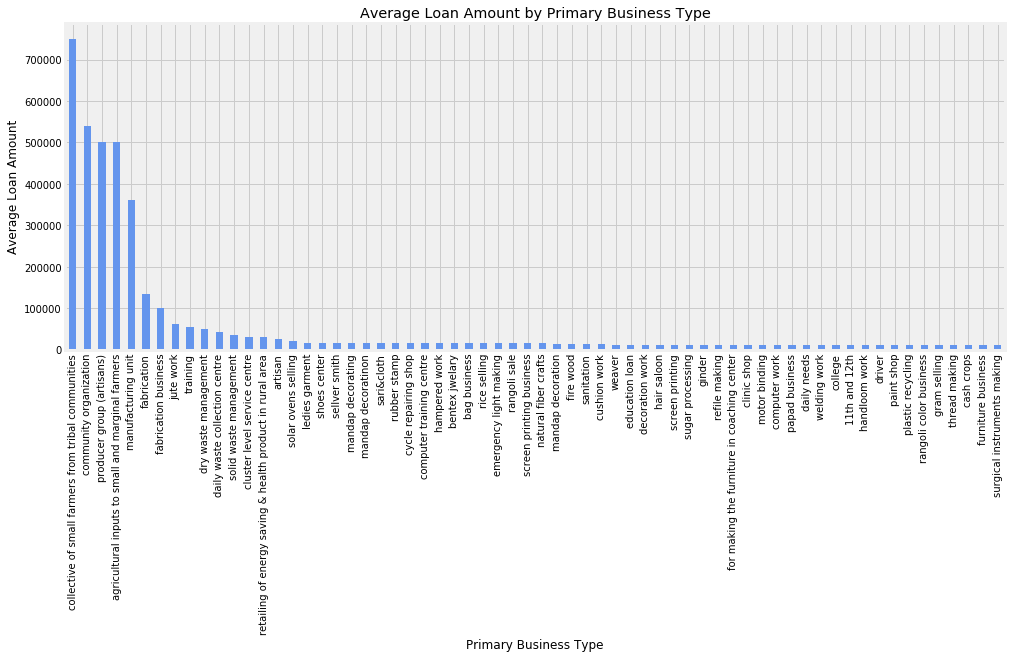

In [92]:
pylab.rcParams['figure.figsize'] = (15.0, 6.0)
Business_loan_high['loan_amount'].plot.bar(color='cornflowerblue');
plt.ylabel('Average Loan Amount')
plt.xlabel('Primary Business Type')
plt.title("Average Loan Amount by Primary Business Type");

In [101]:
Business_loan = data[['loan_amount','Id','annual_income','annual_Expense','primary_business']].groupby('primary_business').agg({'loan_amount':'mean','annual_income':'mean','annual_Expense':'mean','Id':'count'}).sort_values('loan_amount',ascending = False)
Business_loan['Percentage'] = 100 * Business_loan['loan_amount']  / Business_loan['loan_amount'].sum()
Business_loan.head(20)

loan_amount  \
primary_business                                                    
collective of small farmers from tribal communi...  750000.000000   
community organization                              540000.000000   
producer group (artisans)                           500000.000000   
agricultural inputs to small and marginal farmers   500000.000000   
manufacturing unit                                  360000.000000   
fabrication                                         135000.000000   
fabrication business                                100000.000000   
jute work                                            62750.000000   
training                                             53826.086957   
dry waste management                                 50000.000000   
daily waste collection centre                        42500.000000   
solid waste management                               36250.000000   
cluster level service centre                         30000.000000   
retailing of energy saving & health product in ...   30000.000000   
artisan                                              25354.838710   
solar ovens selling                                  19791.666667   
ledies garment                                       15000.000000   
shoes center                                         15000.000000   
sellver smith                                        15000.000000   
mandap decorating                                    15000.000000   

                                                    annual_income  \
primary_business                                                    
collective of small farmers from tribal communi...   43000.000000   
community organization                               30000.000000   
producer group (artisans)                            36000.000000   
agricultural inputs to small and marginal farmers    60000.000000   
manufacturing unit                                   30000.000000   
fabrication                                         150000.000000   
fabrication business                                450000.000000   
jute work                                            41725.000000   
training                                             50782.608696   
dry waste management                                120000.000000   
daily waste collection centre                       136500.000000   
solid waste management                              143125.000000   
cluster level service centre                             0.000000   
retailing of energy saving & health product in ...   30000.000000   
artisan                                              47696.774194   
solar ovens selling                                  20000.000000   
ledies garment                                       96000.000000   
shoes center                                         84000.000000   
sellver smith                                        72000.000000   
mandap decorating                                    60000.000000   

                                                    annual_Expense  Id  \
primary_business                                                         
collective of small farmers from tribal communi...    33000.000000   2   
community organization                                36000.000000   1   
producer group (artisans)                             48000.000000   2   
agricultural inputs to small and marginal farmers     60000.000000   1   
manufacturing unit                                    42000.000000   2   
fabrication                                          408000.000000   2   
fabrication business                                  84000.000000   1   
jute work                                             87450.000000  16   
training                                              74608.695652  23   
dry waste management                                 120000.000000   1   
daily waste collection centre                        120000.000000   4   
solid waste management                                

Average loan amount siginificantly differs amongst primary business types above indicating an important factor in sizing the loan amount

### Combine the level of Primary Business Type

In [106]:
# def new_prmry_bus_type(loans,business_type):
#     if (loans >= 50000):
#         return 'high_loan_amt_bus_type'
#     elif (loans >= 20000 and loans < 50000):
#         return 'mid_loan_amt_bus_type'
#     elif (loans >= 10000 and loans < 20000):
#         return 'low_loan_amt_bus_type'
#     elif (loans >= 5000 and loans < 10000):
#         return 'very_low_loan_amt_bus_type'
#     else:
#         return '<5K_loan_amt_bus_type'
# data['new_primary_bus_class'] = data[['loan_amount','primary_business']].apply(lambda x: new_prmry_bus_type(x['loan_amount'],x['primary_business']),axis = 1)
# data.head()

### saving the data into origial form

In [3]:
original_data = data

## Loan Amount Distribution

Text(0.5, 1.0, 'Loan Amount Distribution')

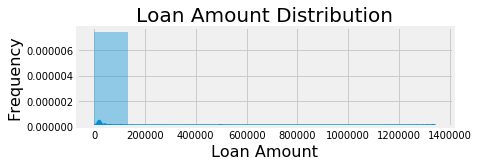

In [348]:
plt.subplot(211)
g = sns.distplot(data["loan_amount"],bins=10)
g.set_xlabel("Loan Amount", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribution", fontsize=20)

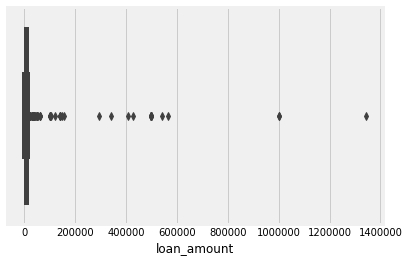

In [347]:
sns.boxplot(x=data['loan_amount'])

# Loan Purpose
## Univariate Analysis

In [8]:
data.loan_purpose.unique()

array(['Apparels', 'Beauty Salon', 'Retail Store', 'Eateries',
       'Meat Businesses', 'Animal husbandry', 'Agro Based Businesses',
       'Farming/ Agriculture', 'Retail Sale', 'Carpentery work',
       'Construction Related Activities', 'Business Services - II',
       'Tobacco Related Activities', 'Repair Services',
       'Laundry Services', 'Food Items', 'Handicrafts',
       'Business Services - I', 'Transportation Services',
       'Flower Business', 'Artifical Jewellry Selling', 'Jewellry Shop',
       'Agarbatti Business', 'Miscellaneous', 'Education Loan',
       'Recycling/ Waste Management', 'Tuition Centre', 'Utensil Selling',
       'Cyber Caf_', 'Others', nan, 'Training', 'Professional',
       'Cable TV Services', 'Vocational Loans', 'Tent Services',
       'Sanitation', 'Manufacturing'], dtype=object)

### No. of Individuals applying by Loan purpose

In [25]:
loan_purpose = data[['Id','loan_purpose']].groupby('loan_purpose').agg({'Id':'count'}).sort_values('Id',ascending = False)
loan_purpose['Percentage'] = 100 * loan_purpose['Id']  / loan_purpose['Id'].sum()
loan_purpose.head(10)

Id  Percentage
loan_purpose                            
apparels                7064     17.6600
agro based businesses   4729     11.8225
animal husbandry        4421     11.0525
meat businesses         4302     10.7550
handicrafts             4230     10.5750
farming/ agriculture    3284      8.2100
education loan          2100      5.2500
retail store            1963      4.9075
eateries                1831      4.5775
business services - ii   854      2.1350

Apparels and agro based business as highest number of applications

## Bi-Variate Analysis

### Average Loan amount by loan purpose

In [26]:
Loan_purpose_amt_Id = data[['loan_amount','Id','loan_purpose']].groupby('loan_purpose').agg({'loan_amount':'mean','Id':'count'}).sort_values('loan_amount',ascending = False)
Loan_purpose_amt_Id['Percentage'] = 100 * Loan_purpose_amt_Id['loan_amount']  / Loan_purpose_amt_Id['loan_amount'].sum()
Loan_purpose_amt_Id.head(20)

loan_amount    Id  Percentage
loan_purpose                                                
manufacturing                292400.000000     1   44.694726
training                      53826.086957    23    8.227573
others                        17693.548387    62    2.704543
sanitation                    12600.000000   101    1.925970
tent services                 12500.000000     6    1.910684
recycling/ waste management   12100.000000   100    1.849542
professional                  10000.000000     3    1.528547
handicrafts                    9986.666667  4230    1.526509
education loan                 9570.761905  2100    1.462936
cyber caf_                     9071.428571     7    1.386611
business services - ii         8968.384075   854    1.370860
flower business                8701.680672   238    1.330093
apparels                       8627.477350  7064    1.318751
tuition centre                 8333.333333     3    1.273790
utensil selling                8326.923077   104    1.272810
agro based businesses          8253.859167  4729    1.261642
laundry services               8206.790123   162    1.254447
animal husbandry               8188.305813  4421    1.251621
eateries                       8142.162753  1831    1.244568
retail sale                    8089.902280   614    1.236580

Average loan amount does siginificantly differs amongst top and bottom categories for loan purpose above indicating that loan purpose is not a differentiating factor in determining the loan Amount

In [27]:
Loan_purpose_amt_Id.tail(20)

loan_amount    Id  Percentage
loan_purpose                                                  
eateries                         8142.162753  1831    1.244568
retail sale                      8089.902280   614    1.236580
farming/ agriculture             8034.713764  3284    1.228144
construction related activities  7971.406959   661    1.218467
artifical jewellry selling       7827.158273   556    1.196418
food items                       7805.263158   285    1.193071
beauty salon                     7767.156863   204    1.187247
tobacco related activities       7719.812427   853    1.180010
jewellry shop                    7666.666667    30    1.171886
repair services                  7604.166667   192    1.162333
cable tv services                7600.000000     5    1.161696
business services - i            7592.391304   276    1.160533
transportation services          7559.183673   245    1.155457
Unknown                          7423.076923    26    1.134652
meat businesses                  7320.897257  4302    1.119034
agarbatti business               7219.626168   107    1.103554
retail store                     7149.516047  1963    1.092837
carpentery work                  6946.488294   299    1.061804
miscellaneous                    6921.052632    19    1.057916
vocational loans                 2500.000000    40    0.382137

In [ ]:
Loan_purpose_amt = data[['loan_amount','loan_purpose']].groupby('loan_purpose').agg({'loan_amount':'mean'}).sort_values('loan_amount',ascending = False)
Loan_purpose_amt['Percentage'] = 100 * Loan_purpose_amt['loan_amount']  / Loan_purpose_amt['loan_amount'].sum()
Loan_purpose_amt.head(50)

Text(0.5, 1.0, 'Average Loan Amount by Loan Purpose')

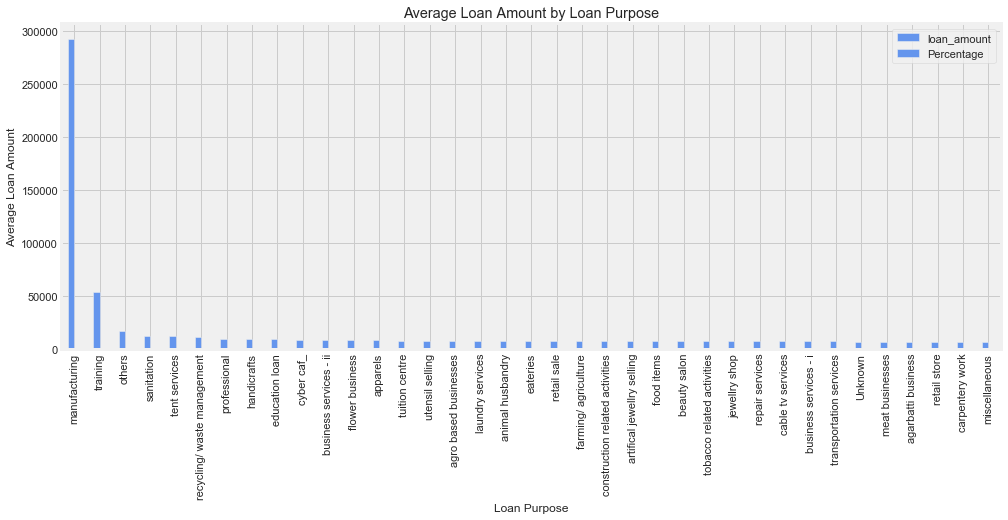

In [253]:
mask = Loan_purpose_amt['loan_amount'] > 5000
Loan_purpose_amt_high = Loan_purpose_amt[mask]
pylab.rcParams['figure.figsize'] = (15.0, 6.0)
Loan_purpose_amt_high.plot.bar(color='cornflowerblue')
plt.ylabel('Average Loan Amount')
plt.xlabel('Loan Purpose')
plt.title("Average Loan Amount by Loan Purpose")

### Loan purpose by primary business type
The loan purpose of individuals is based on their primary business in most of the cases, hence sugeesting either of teh factor can be used to determining factor in Loan amount

In [254]:
purp_loan= ['loan_purpose', 'primary_business']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(data[purp_loan[0]], data[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

### Loan purpose by social class type

In [255]:
loan_purpose_class = ['loan_purpose', 'social_class']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[loan_purpose_class[0]], data[loan_purpose_class[1]]).style.background_gradient(cmap = cm)

## Combine Loan purpose categories

In [28]:
# def loan_purpose(loans,purpose):
#     if (loans >= 50000):
#         return 'high_loan_amt_purpose'
#     elif (loans >= 20000 and loans < 50000):
#         return 'mid_loan_amt_purpose'
#     elif (loans >= 10000 and loans < 20000):
#         return 'low_loan_amt_purpose'
#     elif (loans >= 5000 and loans < 10000):
#         return 'very_low_loan_amt_purpose'
#     else:
#         return '<5K_loan_amt_purpose'
# data['new_loan_purpose'] = data[['loan_amount','loan_purpose']].apply(lambda x: loan_purpose(x['loan_amount'],x['loan_purpose']),axis = 1)
# data.head()

In [115]:
income_laon_purpose = data.groupby(['income_group','new_loan_purpose'])['loan_amount'].aggregate('mean')
income_laon_purpose.unstack('income_group') # to create a pivot view like dataset

income_group               <5K_Annual_Income    High_Income    Low_Income  \
new_loan_purpose                                                            
<5K_loan_amt_purpose             2912.500000    3064.102564   3187.500000   
high_loan_amt_purpose                    NaN  220354.838710  62666.666667   
low_loan_amt_purpose            10800.000000   11843.678161  11323.648280   
mid_loan_amt_purpose                     NaN   23021.359223  23888.888889   
very_low_loan_amt_purpose        5292.825112    6959.034083   6593.299937   

income_group                  Mid_Income     No_Income  Very_Low_Income  
new_loan_purpose                                                         
<5K_loan_amt_purpose         2969.607843   3061.786600      2923.076923  
high_loan_amt_purpose      410138.461538           NaN              NaN  
low_loan_amt_purpose        11309.826015  13076.394850     11700.000000  
mid_loan_amt_purpose        25937.500000  30000.000000              NaN  
very_low_loan_amt_purpose    6551.997677   5461.389961      5788.651877

### Combining levels of loan purpose to reduce the categories

In [165]:
purpose = ['education loan','recycling/ waste management','training','tent services','sanitation','manufacturing']

In [166]:
def loan_prpse(purpose):
    if purpose == 'education loan':
        return 'education loan'
    elif purpose == 'recycling/ waste management':
        return 'recycling/ waste management'
    elif purpose == 'training':
        return 'training'
    elif purpose == 'tent services':
        return 'tent services'
    elif purpose == 'sanitation':
        return 'sanitation'
    elif purpose == 'manufacturing':
        return 'manufacturing'
    else:
        return 'others'

In [168]:
data['new_loan_purpose'] = data[['loan_purpose']].apply(lambda x: loan_prpse(x['loan_purpose']), axis=1)
data.new_loan_purpose.unique()

array(['others', 'education loan', 'recycling/ waste management',
       'training', 'tent services', 'sanitation', 'manufacturing'],
      dtype=object)

In [170]:
data.head()

Id      city  age sex social_class primary_business secondary_business  \
0   1   dhanbad   22   f        mochi        tailoring             others   
1   2  manjapra   21   f          obc        tailoring               none   
2   3   dhanbad   24   m          nai     beauty salon             others   
3   4   Unknown   26   f          obc        tailoring               none   
4   5   nuapada   23   f          obc    general store        agriculture   

   annual_income  monthly_expenses  old_dependents  \
0        36000.0            5000.0               0   
1        94000.0            3600.0               1   
2        48000.0            4000.0               0   
3         7000.0            5000.0               0   
4        36000.0            3500.0               0   

              ...               loan_amount  annual_Expense  \
0             ...                    5000.0         60000.0   
1             ...                    7500.0         43200.0   
2             ...                    5000.0         48000.0   
3             ...                    7500.0         60000.0   
4             ...                    5000.0         42000.0   

  expense_income_ratio  new_social_class     income_group  expense_group  \
0             1.666667            others       Mid_Income   High_Expense   
1             0.459574            others      High_Income    Mid_Expense   
2             1.000000            others       Mid_Income    Mid_Expense   
3             8.571429            others  Very_Low_Income   High_Expense   
4             1.166667            others       Mid_Income    Mid_Expense   

   new_city       new_primary_bus_class  new_loan_purpose  \
0    others  very_low_loan_amt_bus_type            others   
1    others  very_low_loan_amt_bus_type            others   
2    others  very_low_loan_amt_bus_type            others   
3    others  very_low_loan_amt_bus_type            others   
4    others  very_low_loan_amt_bus_type            others   

        new_loan_purposeincome  
0       mid_income_amt_purpose  
1      high_income_amt_purpose  
2       mid_income_amt_purpose  
3  very_low_income_amt_purpose  
4       mid_income_amt_purpose  

[5 rows x 30 columns]

In [123]:
data.to_csv('model_data.csv')

## Loan Amount by Annual Income 

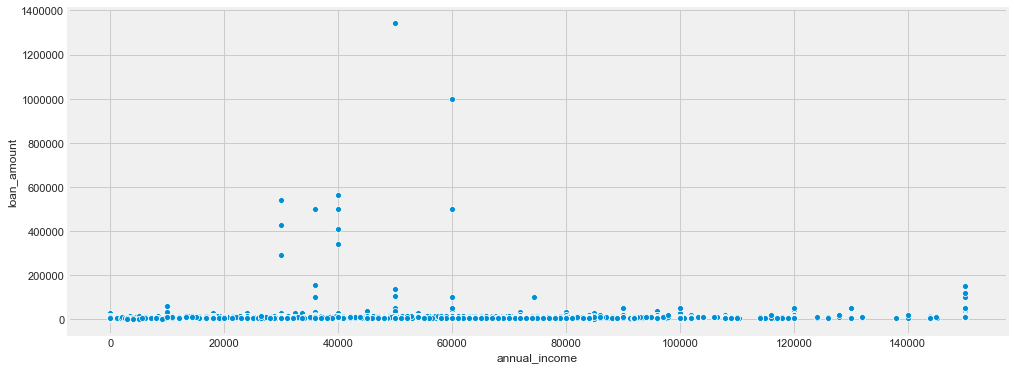

In [260]:
ax = sns.scatterplot(x="annual_income", y="loan_amount",
                     data=data)

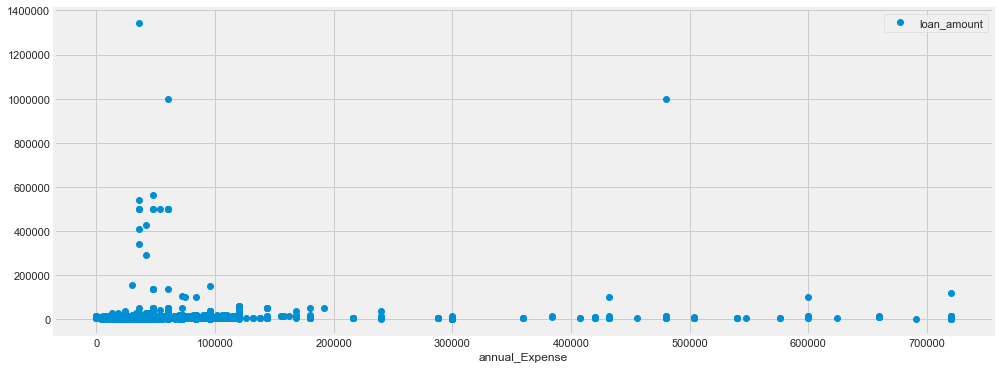

In [266]:
data.plot(x='annual_Expense', y='loan_amount', style='o')

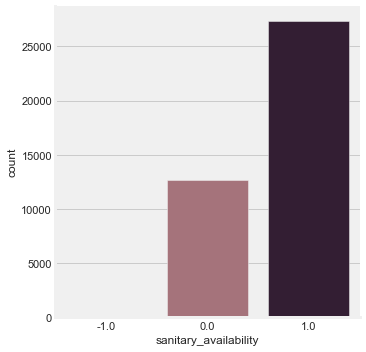

In [267]:
sns.catplot(x="sanitary_availability", kind="count", palette="ch:.25", data=data)

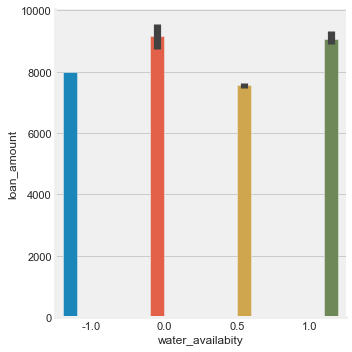

In [268]:
sns.catplot(x="water_availabity", y="loan_amount", hue="water_availabity", kind="bar", data=data)

In [238]:
data.to_csv('model_raw_data.csv')

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [260]:
X = data[['loan_tenure', 'loan_installments','new_social_class','new_city','new_loan_purpose']]
y = data['loan_amount']

In [261]:
X.head()

loan_tenure  loan_installments new_social_class new_city new_loan_purpose
0           12                 12           others   others           others
1           12                 50           others   others           others
2           12                 12           others   others           others
3           12                 50           others   others           others
4           12                 12           others   others           others

# Dummy Encoding

In [207]:
X_new_social_class_dummy = pd.get_dummies(data['new_social_class'])
X_new_social_class = X_new_social_class_dummy.loc[:, X_new_social_class_dummy.columns != 'others']
X_new_social_class.head()

aachari  abc  ambiga  annn  barbour (nai)  baudh  bhovi  bramin  \
0        0    0       0     0              0      0      0       0   
1        0    0       0     0              0      0      0       0   
2        0    0       0     0              0      0      0       0   
3        0    0       0     0              0      0      0       0   
4        0    0       0     0              0      0      0       0   

   chambhar-sc  dhangar(nomadic tribes)       ...         kasar- obc  \
0            0                        0       ...                  0   
1            0                        0       ...                  0   
2            0                        0       ...                  0   
3            0                        0       ...                  0   
4            0                        0       ...                  0   

   lingayath  marwari  minorty  nayadu  not available  papad making  sdf  \
0          0        0        0       0              0             0    0   
1          0        0        0       0              0             0    0   
2          0        0        0       0              0             0    0   
3          0        0        0       0              0             0    0   
4          0        0        0       0              0             0    0   

   traditional weaving  tribal artisans  
0                    0                0  
1                    0                0  
2                    0                0  
3                    0                0  
4                    0                0  

[5 rows x 24 columns]

In [208]:
X_new_city_dummy = pd.get_dummies(data['new_city'])
X_new_city = X_new_city_dummy.loc[:, X_new_city_dummy.columns != 'others']
X_new_city.head()

anupshahr  bahadarpur  bhimanakone  hubli  jalgaon  limdi  mangoan  \
0          0           0            0      0        0      0        0   
1          0           0            0      0        0      0        0   
2          0           0            0      0        0      0        0   
3          0           0            0      0        0      0        0   
4          0           0            0      0        0      0        0   

   near wadhan city  panvel  ranjani  shimoga  shirsode  thakurpukur  thane  \
0                 0       0        0        0         0            0      0   
1                 0       0        0        0         0            0      0   
2                 0       0        0        0         0            0      0   
3                 0       0        0        0         0            0      0   
4                 0       0        0        0         0            0      0   

   varanasi  
0         0  
1         0  
2         0  
3         0  
4         0

In [209]:
X_new_loan_purpose_dummy = pd.get_dummies(data['new_loan_purpose'])
X_new_loan_purpose = X_new_loan_purpose_dummy.loc[:, X_new_loan_purpose_dummy.columns != 'others']
X_new_loan_purpose.head()

education loan  manufacturing  recycling/ waste management  sanitation  \
0               0              0                            0           0   
1               0              0                            0           0   
2               0              0                            0           0   
3               0              0                            0           0   
4               0              0                            0           0   

   tent services  training  
0              0         0  
1              0         0  
2              0         0  
3              0         0  
4              0         0

#### Join with the dataframe

In [210]:
X = pd.concat([X,X_new_loan_purpose,X_new_city,X_new_social_class],axis = 1)
X.head()

loan_tenure  loan_installments new_social_class new_city new_loan_purpose  \
0           12                 12           others   others           others   
1           12                 50           others   others           others   
2           12                 12           others   others           others   
3           12                 50           others   others           others   
4           12                 12           others   others           others   

   education loan  manufacturing  recycling/ waste management  sanitation  \
0               0              0                            0           0   
1               0              0                            0           0   
2               0              0                            0           0   
3               0              0                            0           0   
4               0              0                            0           0   

   tent services       ...         kasar- obc  lingayath  marwari  minorty  \
0              0       ...                  0          0        0        0   
1              0       ...                  0          0        0        0   
2              0       ...                  0          0        0        0   
3              0       ...                  0          0        0        0   
4              0       ...                  0          0        0        0   

   nayadu  not available  papad making  sdf  traditional weaving  \
0       0              0             0    0                    0   
1       0              0             0    0                    0   
2       0              0             0    0                    0   
3       0              0             0    0                    0   
4       0              0             0    0                    0   

   tribal artisans  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 50 columns]

In [213]:
X.drop(X.columns[[2, 3, 4]], axis = 1, inplace = True)
X.head()

loan_tenure  loan_installments  education loan  manufacturing  \
0           12                 12               0              0   
1           12                 50               0              0   
2           12                 12               0              0   
3           12                 50               0              0   
4           12                 12               0              0   

   recycling/ waste management  sanitation  tent services  training  \
0                            0           0              0         0   
1                            0           0              0         0   
2                            0           0              0         0   
3                            0           0              0         0   
4                            0           0              0         0   

   anupshahr  bahadarpur       ...         kasar- obc  lingayath  marwari  \
0          0           0       ...                  0          0        0   
1          0           0       ...                  0          0        0   
2          0           0       ...                  0          0        0   
3          0           0       ...                  0          0        0   
4          0           0       ...                  0          0        0   

   minorty  nayadu  not available  papad making  sdf  traditional weaving  \
0        0       0              0             0    0                    0   
1        0       0              0             0    0                    0   
2        0       0              0             0    0                    0   
3        0       0              0             0    0                    0   
4        0       0              0             0    0                    0   

   tribal artisans  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 47 columns]

## Train_Test Split

In [214]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Running OLS model - All Variables

In [230]:
from statsmodels.api import OLS
from sklearn.metrics import r2_score

In [226]:
ols_model = OLS(y_train,X_train).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     8355.
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:32:04   Log-Likelihood:            -2.9714e+05
No. Observations:               30000   AIC:                         5.944e+05
Df Residuals:                   29958   BIC:                         5.947e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
loan_tenure       

In [228]:
y_ols_pred = ols_model.predict(X)
y_ols_pred.head()

0    7703.888250
1    8691.212107
2    7703.888250
3    8691.212107
4    7703.888250
dtype: float64

In [253]:
y_ols_pred_train = ols_model.predict(X_train)
y_ols_pred_train.head()

23927    9400.927235
1503     9400.927235
20896    7703.888250
28139    7703.888250
32314    7703.888250
dtype: float64

In [254]:
y_ols_pred_test = ols_model.predict(X_test)
y_ols_pred_test.head()

14054    9400.927235
21593    7703.888250
37840    7703.888250
22631    7703.888250
32262    7703.888250
dtype: float64

In [255]:
y_ols_pred_train.to_csv('y_ols_pred_train.csv')
y_ols_pred_test.to_csv('y_ols_pred_test.csv')

In [256]:
y_train.to_csv('y_train.csv')

In [241]:
from sklearn import metrics

In [233]:
y_ols_pred.to_csv('y_ols_pred.csv')
y_test.to_csv('y_test.csv')

In [221]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [223]:
y_pred = regression.predict(X_test)
y_pred

array([9414.23824823, 7739.42559941, 7739.42559941, ..., 7739.42559941,
       8692.03624824, 7739.42559941])

In [248]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

42387999142.22771
1.7966890201801724e+25


In [236]:
y_pred_sk = pd.DataFrame(y_pred) 

In [237]:
y_pred_sk.to_csv('y_pred_sk.csv')

# MAPE - 
Mean absolute percentage error is ~22% for 62% of the test populatin; 
MAPE calculation summary is with excel attached

# OLS algorithm - Numpy

In [264]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [265]:
data.head()

Id      city  age sex social_class primary_business secondary_business  \
0   1   dhanbad   22   f        mochi        tailoring             others   
1   2  manjapra   21   f          obc        tailoring               none   
2   3   dhanbad   24   m          nai     beauty salon             others   
3   4   Unknown   26   f          obc        tailoring               none   
4   5   nuapada   23   f          obc    general store        agriculture   

   annual_income  monthly_expenses  old_dependents  \
0        36000.0            5000.0               0   
1        94000.0            3600.0               1   
2        48000.0            4000.0               0   
3         7000.0            5000.0               0   
4        36000.0            3500.0               0   

              ...               loan_amount  annual_Expense  \
0             ...                    5000.0         60000.0   
1             ...                    7500.0         43200.0   
2             ...                    5000.0         48000.0   
3             ...                    7500.0         60000.0   
4             ...                    5000.0         42000.0   

  expense_income_ratio  new_social_class     income_group  expense_group  \
0             1.666667            others       Mid_Income   High_Expense   
1             0.459574            others      High_Income    Mid_Expense   
2             1.000000            others       Mid_Income    Mid_Expense   
3             8.571429            others  Very_Low_Income   High_Expense   
4             1.166667            others       Mid_Income    Mid_Expense   

   new_city       new_primary_bus_class  new_loan_purpose  \
0    others  very_low_loan_amt_bus_type            others   
1    others  very_low_loan_amt_bus_type            others   
2    others  very_low_loan_amt_bus_type            others   
3    others  very_low_loan_amt_bus_type            others   
4    others  very_low_loan_amt_bus_type            others   

        new_loan_purposeincome  
0       mid_income_amt_purpose  
1      high_income_amt_purpose  
2       mid_income_amt_purpose  
3  very_low_income_amt_purpose  
4       mid_income_amt_purpose  

[5 rows x 30 columns]

### Building an alogorithm within numpy package on numerical variables only

In [96]:
X_numeric = data.loc[:,['age','annual_income','annual_Expense','house_area','loan_tenure','loan_installments']]
y_target = data.loc[:,['loan_amount']]

In [68]:
X_numeric.head()

age  annual_income  annual_Expense  house_area  loan_tenure  \
0   22        36000.0         60000.0        70.0           12   
1   21        94000.0         43200.0        80.0           12   
2   24        48000.0         48000.0        50.0           12   
3   26         7000.0         60000.0        50.0           12   
4   23        36000.0         42000.0       112.0           12   

   loan_installments  
0                 12  
1                 50  
2                 12  
3                 50  
4                 12

In [69]:
y_target.head()

loan_amount
0       5000.0
1       7500.0
2       5000.0
3       7500.0
4       5000.0

In [97]:
X_numeric_numpy = X_numeric.reset_index().values
y_target_numpy = y_target.reset_index().values

In [98]:
X = np.delete(X_numeric_numpy,0,1)
print(X)
X.size

[[2.20e+01 3.60e+04 6.00e+04 7.00e+01 1.20e+01 1.20e+01]
 [2.10e+01 9.40e+04 4.32e+04 8.00e+01 1.20e+01 5.00e+01]
 [2.40e+01 4.80e+04 4.80e+04 5.00e+01 1.20e+01 1.20e+01]
 ...
 [3.50e+01 4.80e+04 4.20e+04 6.00e+02 1.20e+01 1.20e+01]
 [2.80e+01 4.80e+04 4.80e+04 6.00e+02 1.20e+01 1.20e+01]
 [3.20e+01 7.20e+04 5.40e+04 6.00e+02 1.20e+01 1.20e+01]]


240000

In [99]:
y = np.delete(y_target_numpy,0,1)
print(y)
print(len(y))

[[5000.]
 [7500.]
 [5000.]
 ...
 [8000.]
 [8000.]
 [8000.]]
40000


In [103]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

In [104]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

In [105]:
n_samples = len(y)
print(n_samples)
mu = np.mean(X, 0)
print(mu)
sigma = np.std(X, 0)
print(sigma)
X = (X-mu) / sigma

X = np.hstack((np.ones((n_samples,1)),X))
print(X)
n_features = np.size(X,1)
params = np.zeros((n_features,1))
print(params.size)

40000
[5.51599000e+01 3.76402144e+04 4.57193133e+04 5.52804750e+02
 1.20322250e+01 2.17611750e+01]
[3.83030778e+03 2.87387572e+04 5.50324490e+04 4.59686444e+03
 1.36745623e+00 1.66822492e+01]
[[ 1.         -0.00865724 -0.05707326 ... -0.10502915 -0.02356565
  -0.58512344]
 [ 1.         -0.00891832  1.96110726 ... -0.10285375 -0.02356565
   1.69274687]
 [ 1.         -0.00813509  0.36048133 ... -0.10937994 -0.02356565
  -0.58512344]
 ...
 [ 1.         -0.00526326  0.36048133 ...  0.01026684 -0.02356565
  -0.58512344]
 [ 1.         -0.00709079  0.36048133 ...  0.01026684 -0.02356565
  -0.58512344]
 [ 1.         -0.00604649  1.19559052 ...  0.01026684 -0.02356565
  -0.58512344]]
7


Initial cost is:  127821908.125 

Optimal parameters are: 
 [[ 8.35731770e+03]
 [-1.77473353e+01]
 [ 1.20282129e+03]
 [ 1.19493072e+02]
 [ 6.27083787e+00]
 [ 1.12715127e+03]
 [ 2.67171175e+02]] 

Final cost is:  [91050727.0314876]


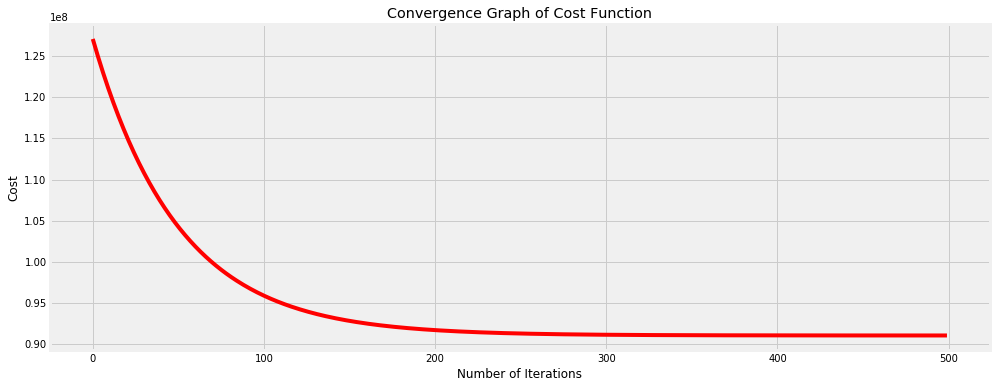

In [111]:
n_iters = 500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) =  (X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Convergence of the algorithm is providing "Optimal Parameters" and reducing the cost by "30%". Hence, the same can be used for prediction of the loan amounts.